In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import tqdm
import copy
import gc
import sys
import os
#import f90nml
import itertools

import bokeh
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, CDSView, GroupFilter, HoverTool
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral11

from bokeh.models.mappers import CategoricalColorMapper

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import scipy as sp
from scipy.sparse import linalg

import importlib
#%cd /data/lyna/cx26-milestoning
import analysis_functions
import seaborn as sns

In [2]:
dataDir='.'
simDataDir='/'.join([dataDir,''])
simDataFilename='Simulation_Milestone_Coordinate_Data.allCyl.0.5ps.csv'
simDataFilePath='/'.join([simDataDir,simDataFilename])
simData=pd.read_csv(simDataFilePath)
display(simData.head())

,Window,Rep,Time,Frame,Rst00_Z,XY_Radius,lowerWall,upperWall,X_Index
0,0,1,0,0,-26.435905,5.872915,-28.0,-26.0,0
1,0,1,500,500,-26.117360,5.653717,-28.0,-26.0,0
2,0,1,1000,1000,-26.374524,5.762395,-28.0,-26.0,0
3,0,1,1500,1500,-25.987833,5.606116,-28.0,-26.0,1
4,0,1,2000,2000,-26.061743,5.124574,-28.0,-26.0,0


In [14]:
# simData.Window=27-simData.Window
# simData.X_Index=27-simData.X_Index
# simData.tail()

,Window,Rep,Time,Frame,Rst00_Z,XY_Radius,lowerWall,upperWall,X_Index
9954800,0,1,9997500,9997500,28.007697,1.573917,26.0,28.0,0
9954801,0,1,9998000,9998000,27.417047,1.898895,26.0,28.0,0
9954802,0,1,9998500,9998500,28.085497,2.174566,26.0,28.0,0
9954803,0,1,9999000,9999000,27.552025,2.642219,26.0,28.0,0
9954804,0,1,9999500,9999500,27.723778,3.388607,26.0,28.0,0


In [3]:
simData['Frame']=simData['Time']
analysisFrame=analysis_functions.add_indexed_milestoning_analysis_columns(
    simData,
    windowColumn='Window',xIndexColumn='X_Index',frameCol='Frame',
    repColumn='Rep',groupingColumn=None,verbose=True,verboseLevel=1)

C:\Users\19094\Desktop\nanotube\analysis_functions.py:429: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simData[groupingCol]=0
C:\Users\19094\Desktop\nanotube\analysis_functions.py:439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simData[repCol]=milestoneData[repCol]
C:\Users\19094\Desktop\nanotube\analysis_functions.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

--- --- --- Grouping Name: 0 --- --- ---
	binSet: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27] ; deltaVal: 1
	--- --- Window Name: 0 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 1 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 2 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 3 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 4 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 5 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 6 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 7 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 8 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 9 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 10 --- 

In [4]:
# frame rate is 0.5ps

kb=0.001985875 #kcal/mol
simTemp=300
kbT=kb*simTemp

binSet=np.sort(np.unique(np.concatenate([
    analysisFrame['Window'].unique(),
    analysisFrame['X_Index'].unique()
])))
print("binSet",binSet)

QdataDict=analysis_functions.compute_analysis_group_Qdata(
    groupDataFrame=analysisFrame,windowColumn='Window',binSet=binSet,
                                     giveBins=True,giveBinMap=True,
                                     giveEscapeMat=True,giveCounts=True,
                                     giveCountsMat=True,givePiVec=True,
                                     giveRiVec=True,giveNijMat=True,giveEdgeMap=True
)
for entryKey in QdataDict:
    print(entryKey,':',QdataDict[entryKey])


binSet [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
Computing R and N: ( 0 : 1 ) ( 1 : 1 ) ( 2 : 1 ) ( 3 : 1 ) ( 4 : 1 ) ( 5 : 1 ) ( 6 : 1 ) ( 7 : 1 ) ( 8 : 1 ) ( 9 : 1 ) ( 10 : 1 ) ( 11 : 1 ) ( 12 : 1 ) ( 13 : 1 ) ( 14 : 1 ) ( 15 : 1 ) ( 16 : 1 ) ( 17 : 1 ) ( 18 : 1 ) ( 19 : 1 ) ( 20 : 1 ) ( 21 : 1 ) ( 22 : 1 ) ( 23 : 1 ) ( 24 : 1 ) ( 25 : 1 ) ( 26 : 1 ) ( 27 : 1 ) 
Rmat :   (0, 1)	18551.050782913324
  (1, 0)	9262.580995939556
  (1, 2)	9040.019231048083
  (2, 1)	9020.253044620993
  (2, 3)	9231.785034757646
  (3, 2)	9076.486859611003
  (3, 4)	9136.842142770562
  (4, 3)	9019.224699312033
  (4, 5)	8816.26102814782
  (5, 4)	8669.178698058378
  (5, 6)	8305.778910634286
  (6, 5)	8815.740724849093
  (6, 7)	8282.414661138115
  (7, 6)	7889.110630899508
  (7, 8)	6847.686902380133
  (8, 7)	6187.756718849426
  (8, 9)	2043.937539002591
  (9, 8)	1170.0974396814586
  (9, 10)	206.47805653976553
  (10, 9)	117.03676325379247
  (10, 11)	22.27806328189516
  (11, 

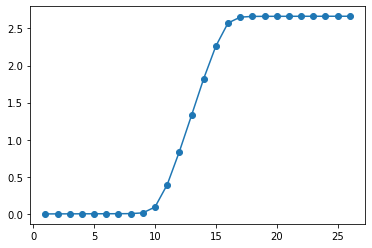

In [5]:
tauVec=QdataDict['tauVec']
frq=0.5*10**-6 #frame rate in us
plt.plot(np.arange(1,27),
    np.sort(tauVec-np.min(tauVec))*frq, marker="o")

In [5]:
milestoning_analysis_dict=QdataDict
milestoning_analysis_dict.keys()

mcmc_pi_results=analysis_functions.mcmc_kij(
        Tmat_0=milestoning_analysis_dict['escapeMat'].todense(),
        Cmat_0=milestoning_analysis_dict['countsMat'].todense(),
        nsamples=500,
        iterationsPerSample=50, #deltaRange=[-Tii_old/iterationsPerSample,Tij_old/iterationsPerSample], large iterationPerSample gives small delta, higher acceptance
    ) #1000 for nsamples
mcmc_pi_results['piVecs']


C:\Users\19094\Desktop\nanotube\analysis_functions.py:1598: RuntimeWarning: invalid value encountered in log
  Cij*(np.log(Tij_old-delta)-np.log(Tij_old))


number of acceptance =  4


[array([6.63098103e-02, 6.28490305e-02, 6.26743864e-02, 6.25286253e-02,
        6.12353245e-02, 5.82313673e-02, 5.89551348e-02, 5.06867445e-02,
        2.82293254e-02, 5.45511732e-03, 6.68950601e-04, 1.16836727e-04,
        7.97930399e-05, 7.14724219e-05, 7.30510620e-05, 8.02770696e-05,
        1.20028790e-04, 6.80911969e-04, 5.32639610e-03, 2.62152476e-02,
        4.68798273e-02, 5.58785506e-02, 5.59672070e-02, 5.60770887e-02,
        5.74773857e-02, 5.74920526e-02, 5.82405231e-02, 6.13995337e-02]),
 array([6.63098103e-02, 6.28490305e-02, 6.26743864e-02, 6.25286253e-02,
        6.12353245e-02, 5.82313673e-02, 5.89551348e-02, 5.06867445e-02,
        2.82293254e-02, 5.45511732e-03, 6.68950601e-04, 1.16836727e-04,
        7.97930399e-05, 7.14724219e-05, 7.30510620e-05, 8.02770696e-05,
        1.20028790e-04, 6.80911969e-04, 5.32639610e-03, 2.62152476e-02,
        4.68798273e-02, 5.58785506e-02, 5.59672070e-02, 5.60770887e-02,
        5.74773857e-02, 5.74920526e-02, 5.82405231e-02, 6.1399

windowCenters [-27. -25. -23. -21. -19. -17. -15. -13. -11.  -9.  -7.  -5.  -3.  -1.
   1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.  23.  25.  27.] len 28
outward milestoneCenters [-27. -25. -23. -21. -19. -17. -15. -13. -11.  -9.  -7.  -5.  -3.  -1.
   1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.  23.  25.  27.] len 28
inward milestoneCenters [ 29.  27.  25.  23.  21.  19.  17.  15.  13.  11.   9.   7.   5.   3.
   1.  -1.  -3.  -5.  -7.  -9. -11. -13. -15. -17. -19. -21. -23. -25.] len 28
len 28 28
piMeans [0.         0.03193427 0.03359207 0.03497924 0.04743082 0.0773977
 0.07003851 0.16006555 0.50876718 1.48808588 2.73835258 3.77791808
 4.00510685 4.07071497 4.05769934 4.00150384 3.7618598  2.72779399
 1.50231225 0.5528656  0.20658088 0.10196908 0.10102459 0.09985607
 0.08516203 0.08501003 0.07730404 0.04583535]


(-30.0, 30.0)

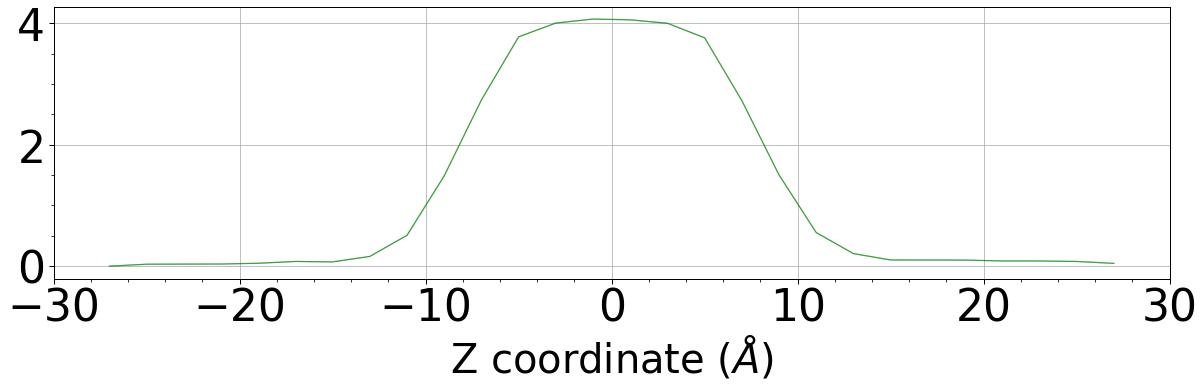

In [7]:
plt.figure(figsize=(20,5))
sns.set_context("paper",font_scale=5)

windowCenters=np.arange(-27,29,2.0)
print("windowCenters", windowCenters, "len", len(windowCenters))
milestoneCenters=np.arange(-27,29,2.0)
print("outward milestoneCenters",milestoneCenters, "len", len(milestoneCenters))
rev_milestoneCenters=np.arange(29,-27,-2.0)
print("inward milestoneCenters",rev_milestoneCenters, "len", len(rev_milestoneCenters))
print("len", len(windowCenters),len(milestoneCenters))

xgrid=windowCenters
alpha=0.2 ##.05 for 97.5% tail

mcmcpiVecs=np.array(mcmc_pi_results['piVecs'])
mcmcpiVecs=mcmcpiVecs/np.atleast_2d(np.min(mcmcpiVecs,axis=1)).T  # normalized piVec by minimum value (i.e., max pmf)
piVecs=-kbT*np.log(mcmcpiVecs)
piVecs=piVecs-np.min(piVecs)

piMeans=np.mean(piVecs,axis=0)

piUppers=np.quantile(
    piVecs,
    q=1-alpha/2.,
    axis=0
)
#print (piUppers)
piLowers=np.quantile(
    piVecs,
    q=alpha/2.,
    axis=0
)
print("piMeans",piMeans)

# sns.lineplot(
#     x=xgrid,
#     y=piMeans-np.min(piMeans),
#     color='blue',
#     #label='MCMC PMF Mean',
# )
sns.lineplot(
    x=xgrid,
    y=piLowers-np.min(piLowers),
    color='green', alpha=0.5
)
sns.lineplot(
    x= xgrid,
    y=piUppers-np.min(piUppers),
    color='green',alpha=0.5
)
plt.minorticks_on()
plt.grid()
#plt.title('Milstone Sampling',fontsize=30)
plt.xlabel('Z coordinate ($\AA$)',fontsize=40)
plt.xlim(-30,30)
# plt.ylabel('PMF (kcal/mol)',fontsize=20)

In [10]:
print (piLowers)
print (piUppers)
print (piMeans)

[0.         0.03193427 0.03359207 0.03497924 0.04743082 0.0773977
 0.07003851 0.16006555 0.50876718 1.48808588 2.73835258 3.77791808
 4.00510685 4.07071497 4.05769934 4.00150384 3.7618598  2.72779399
 1.50231225 0.5528656  0.20658088 0.10196908 0.10102459 0.09985607
 0.08516203 0.08501003 0.07730404 0.04583535]
[0.         0.03193427 0.03359207 0.03497924 0.04743082 0.0773977
 0.07003851 0.16006555 0.50876718 1.48808588 2.73835258 3.77791808
 4.00510685 4.07071497 4.05769934 4.00150384 3.7618598  2.72779399
 1.50231225 0.5528656  0.20658088 0.10196908 0.10102459 0.09985607
 0.08516203 0.08501003 0.07730404 0.04583535]
[0.         0.03193427 0.03359207 0.03497924 0.04743082 0.0773977
 0.07003851 0.16006555 0.50876718 1.48808588 2.73835258 3.77791808
 4.00510685 4.07071497 4.05769934 4.00150384 3.7618598  2.72779399
 1.50231225 0.5528656  0.20658088 0.10196908 0.10102459 0.09985607
 0.08516203 0.08501003 0.07730404 0.04583535]


In [21]:
tt=piMeans-piLowers
print(np.mean(tt))

1.2073675392798577e-15


   denseInd  sparseInd
0         0          0
1         1         27
2         2         53
3         3         78
4         4        102


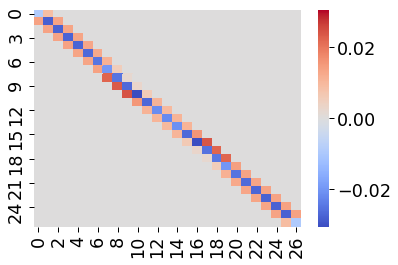

In [9]:
Qmat=milestoning_analysis_dict['Qmat']
NijMat=milestoning_analysis_dict['NijMat']
RiVec=milestoning_analysis_dict['RiVec']

edgeIndToPair=milestoning_analysis_dict['edgeMap']['edgeIndToPair']
edgePairToInd=milestoning_analysis_dict['edgeMap']['edgePairToInd']

nzInds=np.nonzero(Qmat.todense())
nzArr=np.array([
    edgeIndToPair[nzInds[0]],
    edgeIndToPair[nzInds[1]]])
n_cells=len(milestoning_analysis_dict['piVec'])
tempMap=np.array([
    edgePairToInd[ii,ii+1] for ii in np.arange(n_cells-1)
])

denseToSparseMapTable=pd.DataFrame({
    'denseInd':np.arange(len(tempMap)),
    'sparseInd':tempMap
})
print(denseToSparseMapTable.head())

QmatDense=np.zeros(shape=(len(denseToSparseMapTable),len(denseToSparseMapTable)))
NijMatDense=np.zeros(shape=(len(denseToSparseMapTable),len(denseToSparseMapTable)))
RiVecDense=np.zeros(shape=len(denseToSparseMapTable))

s_to_d=denseToSparseMapTable.set_index('sparseInd')

d_nzInds=(
    s_to_d.loc[nzInds[0]].to_numpy().flatten(),
    s_to_d.loc[nzInds[1]].to_numpy().flatten()
)

QmatDense[d_nzInds]=np.array(Qmat.todense())[nzInds]
NijMatDense[d_nzInds]=np.array(NijMat.todense())[nzInds]

ri_nzInds=np.nonzero(RiVec)
ri_d_nzInds=(s_to_d.loc[ri_nzInds[0]].to_numpy().flatten())
RiVecDense[ri_d_nzInds]=RiVec[ri_d_nzInds]
np.sum(np.zeros(shape=(4,5)),axis=1)
diagInds=(np.arange(n_cells-1),np.arange(n_cells-1))
QmatDense[diagInds]=-np.sum(QmatDense,axis=1)
#display(QmatDense)
vlim=np.max(np.abs(QmatDense))
sns.heatmap(QmatDense,cmap='coolwarm',center=0,vmin=-vlim,vmax=vlim)
plt.show()


In [10]:
with tqdm.tqdm_notebook() as pbar:
    mcmc_analysis_results=analysis_functions.monte_carlo_milestoning_error(
        Q0=QmatDense, 
        N_pre=NijMatDense, 
        R_pre=RiVecDense, 
        #p_equil, 
        #T_tot, 
        do_on = False, num = 1000, skip = 100, stride =10,  verbose= False,
        pbar=None
    )


<ipython-input-10-7f38b156bc1a>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm.tqdm_notebook() as pbar:


C:\Users\19094\Desktop\nanotube\analysis_functions.py:1406: RuntimeWarning: divide by zero encountered in double_scalars
  Q_gamma = gamma.rvs(a=N[i,j], scale = 1/R[i],)
C:\Users\19094\Desktop\nanotube\analysis_functions.py:1413: RuntimeWarning: invalid value encountered in double_scalars
  log_p_Q_new = N[i,j] * log(Qnew[i,j] - delta) - (Qnew[i,j] - delta) * R[i] #+ -(Qnew[i,i] + delta) * R[i]


counter:  110 ; # nonzero Qhat eigval:  (26,)
counter:  120 ; # nonzero Qhat eigval:  (26,)
counter:  130 ; # nonzero Qhat eigval:  (26,)
counter:  140 ; # nonzero Qhat eigval:  (26,)
counter:  150 ; # nonzero Qhat eigval:  (26,)
counter:  160 ; # nonzero Qhat eigval:  (26,)
counter:  170 ; # nonzero Qhat eigval:  (26,)
counter:  180 ; # nonzero Qhat eigval:  (26,)
counter:  190 ; # nonzero Qhat eigval:  (26,)
counter:  200 ; # nonzero Qhat eigval:  (26,)
counter:  210 ; # nonzero Qhat eigval:  (26,)
counter:  220 ; # nonzero Qhat eigval:  (26,)
counter:  230 ; # nonzero Qhat eigval:  (26,)
counter:  240 ; # nonzero Qhat eigval:  (26,)
counter:  250 ; # nonzero Qhat eigval:  (26,)
counter:  260 ; # nonzero Qhat eigval:  (26,)
counter:  270 ; # nonzero Qhat eigval:  (26,)
counter:  280 ; # nonzero Qhat eigval:  (26,)
counter:  290 ; # nonzero Qhat eigval:  (26,)
counter:  300 ; # nonzero Qhat eigval:  (26,)
counter:  310 ; # nonzero Qhat eigval:  (26,)
counter:  320 ; # nonzero Qhat eig

counter:  1920 ; # nonzero Qhat eigval:  (26,)
counter:  1930 ; # nonzero Qhat eigval:  (26,)
counter:  1940 ; # nonzero Qhat eigval:  (26,)
counter:  1950 ; # nonzero Qhat eigval:  (26,)
counter:  1960 ; # nonzero Qhat eigval:  (26,)
counter:  1970 ; # nonzero Qhat eigval:  (26,)
counter:  1980 ; # nonzero Qhat eigval:  (26,)
counter:  1990 ; # nonzero Qhat eigval:  (26,)
counter:  2000 ; # nonzero Qhat eigval:  (26,)
counter:  2010 ; # nonzero Qhat eigval:  (26,)
counter:  2020 ; # nonzero Qhat eigval:  (26,)
counter:  2030 ; # nonzero Qhat eigval:  (26,)
counter:  2040 ; # nonzero Qhat eigval:  (26,)
counter:  2050 ; # nonzero Qhat eigval:  (26,)
counter:  2060 ; # nonzero Qhat eigval:  (26,)
counter:  2070 ; # nonzero Qhat eigval:  (26,)
counter:  2080 ; # nonzero Qhat eigval:  (26,)
counter:  2090 ; # nonzero Qhat eigval:  (26,)
counter:  2100 ; # nonzero Qhat eigval:  (26,)
counter:  2110 ; # nonzero Qhat eigval:  (26,)
counter:  2120 ; # nonzero Qhat eigval:  (26,)
counter:  213

counter:  3710 ; # nonzero Qhat eigval:  (26,)
counter:  3720 ; # nonzero Qhat eigval:  (26,)
counter:  3730 ; # nonzero Qhat eigval:  (26,)
counter:  3740 ; # nonzero Qhat eigval:  (26,)
counter:  3750 ; # nonzero Qhat eigval:  (26,)
counter:  3760 ; # nonzero Qhat eigval:  (26,)
counter:  3770 ; # nonzero Qhat eigval:  (26,)
counter:  3780 ; # nonzero Qhat eigval:  (26,)
counter:  3790 ; # nonzero Qhat eigval:  (26,)
counter:  3800 ; # nonzero Qhat eigval:  (26,)
counter:  3810 ; # nonzero Qhat eigval:  (26,)
counter:  3820 ; # nonzero Qhat eigval:  (26,)
counter:  3830 ; # nonzero Qhat eigval:  (26,)
counter:  3840 ; # nonzero Qhat eigval:  (26,)
counter:  3850 ; # nonzero Qhat eigval:  (26,)
counter:  3860 ; # nonzero Qhat eigval:  (26,)
counter:  3870 ; # nonzero Qhat eigval:  (26,)
counter:  3880 ; # nonzero Qhat eigval:  (26,)
counter:  3890 ; # nonzero Qhat eigval:  (26,)
counter:  3900 ; # nonzero Qhat eigval:  (26,)
counter:  3910 ; # nonzero Qhat eigval:  (26,)
counter:  392

counter:  5480 ; # nonzero Qhat eigval:  (26,)
counter:  5490 ; # nonzero Qhat eigval:  (26,)
counter:  5500 ; # nonzero Qhat eigval:  (26,)
counter:  5510 ; # nonzero Qhat eigval:  (26,)
counter:  5520 ; # nonzero Qhat eigval:  (26,)
counter:  5530 ; # nonzero Qhat eigval:  (26,)
counter:  5540 ; # nonzero Qhat eigval:  (26,)
counter:  5550 ; # nonzero Qhat eigval:  (26,)
counter:  5560 ; # nonzero Qhat eigval:  (26,)
counter:  5570 ; # nonzero Qhat eigval:  (26,)
counter:  5580 ; # nonzero Qhat eigval:  (26,)
counter:  5590 ; # nonzero Qhat eigval:  (26,)
counter:  5600 ; # nonzero Qhat eigval:  (26,)
counter:  5610 ; # nonzero Qhat eigval:  (26,)
counter:  5620 ; # nonzero Qhat eigval:  (26,)
counter:  5630 ; # nonzero Qhat eigval:  (26,)
counter:  5640 ; # nonzero Qhat eigval:  (26,)
counter:  5650 ; # nonzero Qhat eigval:  (26,)
counter:  5660 ; # nonzero Qhat eigval:  (26,)
counter:  5670 ; # nonzero Qhat eigval:  (26,)
counter:  5680 ; # nonzero Qhat eigval:  (26,)
counter:  569

counter:  7280 ; # nonzero Qhat eigval:  (26,)
counter:  7290 ; # nonzero Qhat eigval:  (26,)
counter:  7300 ; # nonzero Qhat eigval:  (26,)
counter:  7310 ; # nonzero Qhat eigval:  (26,)
counter:  7320 ; # nonzero Qhat eigval:  (26,)
counter:  7330 ; # nonzero Qhat eigval:  (26,)
counter:  7340 ; # nonzero Qhat eigval:  (26,)
counter:  7350 ; # nonzero Qhat eigval:  (26,)
counter:  7360 ; # nonzero Qhat eigval:  (26,)
counter:  7370 ; # nonzero Qhat eigval:  (26,)
counter:  7380 ; # nonzero Qhat eigval:  (26,)
counter:  7390 ; # nonzero Qhat eigval:  (26,)
counter:  7400 ; # nonzero Qhat eigval:  (26,)
counter:  7410 ; # nonzero Qhat eigval:  (26,)
counter:  7420 ; # nonzero Qhat eigval:  (26,)
counter:  7430 ; # nonzero Qhat eigval:  (26,)
counter:  7440 ; # nonzero Qhat eigval:  (26,)
counter:  7450 ; # nonzero Qhat eigval:  (26,)
counter:  7460 ; # nonzero Qhat eigval:  (26,)
counter:  7470 ; # nonzero Qhat eigval:  (26,)
counter:  7480 ; # nonzero Qhat eigval:  (26,)
counter:  749

counter:  9030 ; # nonzero Qhat eigval:  (26,)
counter:  9040 ; # nonzero Qhat eigval:  (26,)
counter:  9050 ; # nonzero Qhat eigval:  (26,)
counter:  9060 ; # nonzero Qhat eigval:  (26,)
counter:  9070 ; # nonzero Qhat eigval:  (26,)
counter:  9080 ; # nonzero Qhat eigval:  (26,)
counter:  9090 ; # nonzero Qhat eigval:  (26,)
counter:  9100 ; # nonzero Qhat eigval:  (26,)
counter:  9110 ; # nonzero Qhat eigval:  (26,)
counter:  9120 ; # nonzero Qhat eigval:  (26,)
counter:  9130 ; # nonzero Qhat eigval:  (26,)
counter:  9140 ; # nonzero Qhat eigval:  (26,)
counter:  9150 ; # nonzero Qhat eigval:  (26,)
counter:  9160 ; # nonzero Qhat eigval:  (26,)
counter:  9170 ; # nonzero Qhat eigval:  (26,)
counter:  9180 ; # nonzero Qhat eigval:  (26,)
counter:  9190 ; # nonzero Qhat eigval:  (26,)
counter:  9200 ; # nonzero Qhat eigval:  (26,)
counter:  9210 ; # nonzero Qhat eigval:  (26,)
counter:  9220 ; # nonzero Qhat eigval:  (26,)
counter:  9230 ; # nonzero Qhat eigval:  (26,)
counter:  924

In [11]:
print (mcmc_analysis_results[0])

[array([5.35162650e+06, 5.35151349e+06, 5.35132776e+06, 5.35106797e+06,
       5.35072774e+06, 5.35029544e+06, 5.34975704e+06, 5.34902816e+06,
       5.34697341e+06, 5.32720167e+06, 5.16947129e+06, 4.54389709e+06,
       3.66161996e+06, 2.66743663e+06, 1.68556138e+06, 7.90245435e+05,
       1.86940945e+05, 2.93677763e+04, 8.83393053e+03, 6.66458615e+03,
       5.73716131e+03, 4.89411670e+03, 4.02349547e+03, 3.10364742e+03,
       2.11411382e+03, 1.08484168e+03]), array([5.28913532e+06, 5.28902931e+06, 5.28885061e+06, 5.28859787e+06,
       5.28826484e+06, 5.28784010e+06, 5.28730974e+06, 5.28659043e+06,
       5.28456027e+06, 5.26502002e+06, 5.10913241e+06, 4.49086492e+06,
       3.61889173e+06, 2.63631807e+06, 1.66590771e+06, 7.81044844e+05,
       1.84783385e+05, 2.90492513e+04, 8.75453376e+03, 6.60993001e+03,
       5.69227746e+03, 4.85734466e+03, 3.99438285e+03, 3.08198138e+03,
       2.09986538e+03, 1.07777381e+03]), array([5.29417858e+06, 5.29407200e+06, 5.29389273e+06, 5.29363942

In [12]:
mil_center=np.arange(-25,27,2)
print (mil_center)
rev_mil_center=[25,23,21,19,17,15,13,11,9,7,5,3,1,-1,-3,-5,-7,-9,-11,-13,-15,-17,-19,-21,-23,-25]

[-25 -23 -21 -19 -17 -15 -13 -11  -9  -7  -5  -3  -1   1   3   5   7   9
  11  13  15  17  19  21  23  25]


frame size: 2000000.0


<Figure size 1440x360 with 0 Axes>

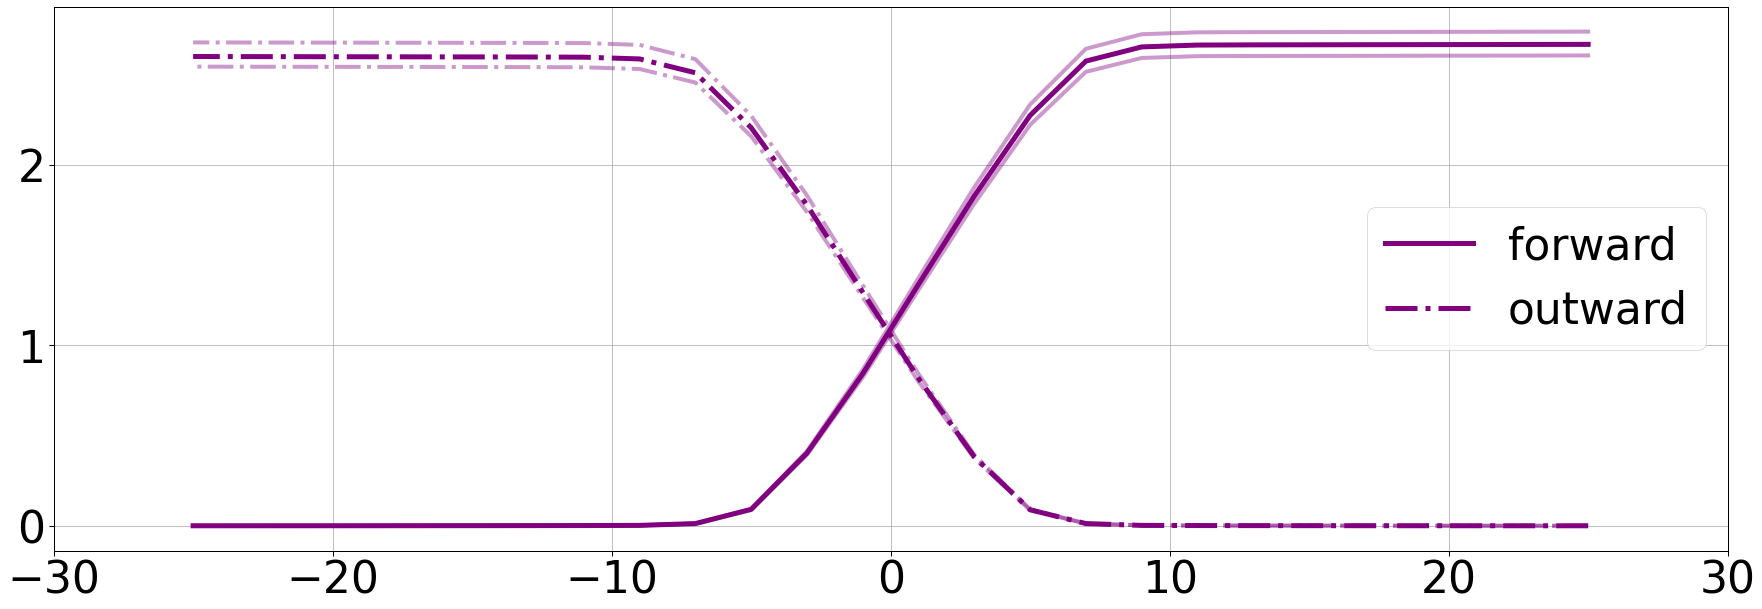

In [82]:
rev_mcmctau=pd.read_csv("rev_mcmctau.csv", index_col=0,delim_whitespace=False,header=0)
rev_mcmctau.head()
##### PMF CI98 ###############
#fig, ax1 = plt.subplots(figsize=(12,8))
# color = 'tab:red'
# ax1.set_xlabel('Z ($\AA$)')
# ax1.set_ylabel("PMF (kcal/mol)", color=color)
# ax1.plot(windowCenters[1:], (piMeans-np.min(piMeans)-2)[1:], color=color,linewidth=2, alpha=.5)
# ax1.plot(windowCenters[1:], (piMeans-np.min(piMeans)-2)[1:],'ro', color=color)
# ax1.plot(windowCenters[1:], (piLowers-np.min(piLowers)-2)[1:], color=color,linewidth=4, alpha=.2)
# ax1.plot(windowCenters[1:], (piUppers-np.min(piUppers)-2)[1:], color=color,linewidth=4, alpha=.2)
# ax1.tick_params(axis='y', labelcolor=color)

############### MFPT CI95 #################
plt.figure(figsize=(20,5))
sns.set_context("paper",font_scale=5)
mcmctau=pd.DataFrame(mcmc_analysis_results[0])
#rev_mcmctau=pd.DataFrame(rev_mcmc_analysis_results[0])
freq=(1/0.5)*10**6 # 0.5ps per frame, unit is us
#freq=1000000 # change unit from ps to us # 1ps/frame
print ("frame size:",freq)

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
fig, ax1=plt.subplots(figsize=(30,10))
color = 'tab:blue'
#ax1.set_ylabel("MFPT ($\mu$s)",color=color)  # we already handled the x-label with ax1
#ax1.set_xlabel('Z coordinate ($\AA$)')
ax1.plot(mil_center,np.max(np.min(mcmctau)/freq)-np.min(mcmctau)/freq+np.min(np.min(mcmctau)/freq),\
         linewidth=4, alpha=.4,color='purple')
ax1.plot(mil_center,np.max(np.max(mcmctau)/freq)-np.max(mcmctau)/freq+np.min(np.max(mcmctau)/freq),\
         linewidth=4, alpha=.4,color='purple')
ax1.plot(mil_center,np.max(np.mean(mcmctau)/freq)-np.mean(mcmctau)/freq+np.min(np.mean(mcmctau)/freq),\
         linewidth=5,label='forward',color='purple')

ax1.plot(rev_mil_center,np.max(np.min(rev_mcmctau)/freq)-np.min(rev_mcmctau)/freq+np.min(np.min(rev_mcmctau)/freq),\
         linewidth=4, alpha=.4,color='purple',linestyle='-.')
ax1.plot(rev_mil_center,np.max(np.max(rev_mcmctau)/freq)-np.max(rev_mcmctau)/freq+np.min(np.max(rev_mcmctau)/freq),\
         linewidth=4, alpha=.4,color='purple',linestyle='-.')
ax1.plot(rev_mil_center,np.max(np.mean(rev_mcmctau)/freq)-np.mean(rev_mcmctau)/freq+np.min(np.mean(rev_mcmctau)/freq),\
         linewidth=5,label='outward',color='purple',linestyle='-.')

# ax2.plot(b.Zb,b.MFPTb/1000, 'b+',color=color)
# ax2.plot(b.Z,b.MFPTf/1000,linewidth=4, alpha=.5)
# ax2.plot(b.Z,b.MFPTf/1000,'yo')
# ax2.tick_params(axis='y', labelcolor=color)
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.xticks(np.arange(-27,29,5))
# plt.yticks(np.arange(0,3.0,0.5))
# plt.xlim(-27,27)
# plt.grid( linestyle='-', linewidth=1)
plt.xlim(-30,30)
plt.legend()
plt.grid(True)
plt.show()


In [32]:
st_max=np.max(np.max(mcmctau)/freq)-np.max(mcmctau)/freq+np.min(np.max(mcmctau)/freq)
mean=np.max(np.mean(mcmctau)/freq)-np.mean(mcmctau)/freq+np.min(np.mean(mcmctau)/freq)
diff=st_max-mean
print ("std average for max:",np.mean(diff))
#print ("std for each window")
#print (diff)
st_min=np.max(np.min(mcmctau)/freq)-np.min(mcmctau)/freq+np.min(np.min(mcmctau)/freq)
diff_min=mean-st_min
print ("std average for min:",np.mean(diff_min))
#print ("std for each window")
#print (diff_min)

std average for max: 0.033986455774876446
std average for min: 0.029584147524196944


In [34]:
a=np.mean(diff)
b=np.mean(diff_min)
print ((a+b)/2)

0.0317853016495367


In [36]:
print (np.max(mean))

2.666601963097686
